# Exploratoy Data Analysis

## Imports

In [1]:
import pandas as pd
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt

## Connection with the database

In [2]:
DB_PATH = Path("../data/olist.db")
conn = sqlite3.connect(DB_PATH)

## Control querys

In [3]:
query = """
SELECT COUNT(*) AS total_orders
FROM fact_orders;"""

df = pd.read_sql(query, conn)

df

,total_orders
0,96478


In [4]:
query2 = """
SELECT COUNT(*) 
FROM olist_orders_dataset
WHERE order_status = 'delivered';
"""

df2 = pd.read_sql(query2, conn)

df2

,COUNT(*)
0,96478


we did not loose any order or have duplicates.

In [5]:
query = """
SELECT order_id, COUNT(*) AS cnt
FROM fact_orders
GROUP BY order_id
HAVING COUNT(*) > 1;
"""

pd.read_sql(query, conn)

,order_id,cnt


return void like we wanted.

## Revenue vs. Payments

In [15]:
query = """
SELECT 
    COUNT(*) AS total_orders,
    SUM(order_revenue) AS total_revenue,
    SUM(total_paid) AS total_paid
FROM fact_orders2;
"""

df = pd.read_sql(query, conn)

df

,total_orders,total_revenue,total_paid
0,96478,1.541977e+07,1.542246e+07


In [16]:
query = """
SELECT 
    COUNT(*) AS total_orders,
    SUM(order_revenue) AS total_revenue,
    SUM(total_paid) AS total_paid
FROM fact_orders3;
"""

df = pd.read_sql(query, conn)

df

,total_orders,total_revenue,total_paid
0,96478,1.541977e+07,1.542246e+07


In [18]:
query = """ 
SELECT
    COUNT(*) AS total_orders,
    SUM(CASE WHEN ABS(order_revenue - total_paid) > 0 THEN 1 ELSE 0 END) AS orders_with_gap
FROM fact_orders2;
"""

df_gaps = pd.read_sql(query, conn)

df_gaps

,total_orders,orders_with_gap
0,96478,19320


There are 19320 orders that the payment is lower than the order revenue. 

### Veamoslo dividiendo los datos por mes

In [8]:
query = """
SELECT
    strftime('%Y-%m', date) AS year_month,
    SUM(order_revenue) AS theoretical_revenue,
    SUM(total_paid) AS actual_revenue
    FROM fact_orders
    GROUP BY year_month
    ORDER BY year_month;
"""

df_rev = pd.read_sql(query, conn)



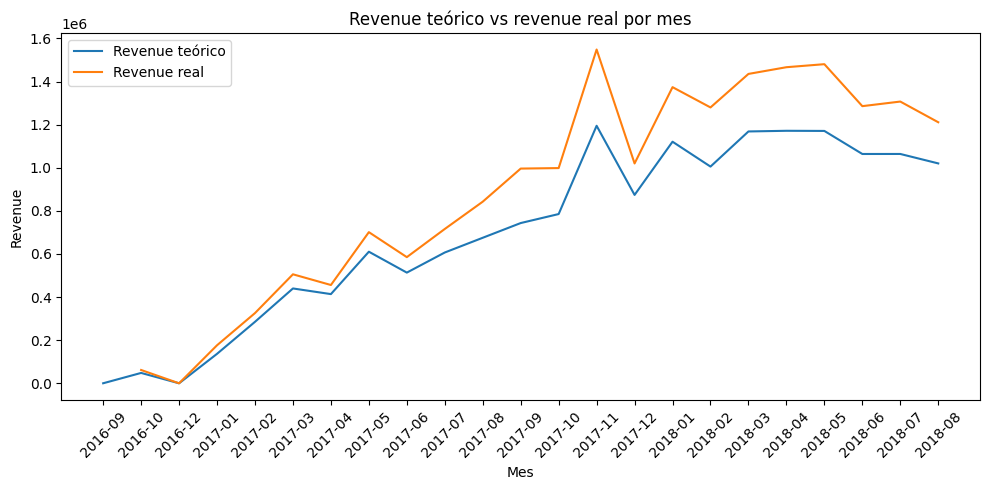

In [9]:
plt.figure(figsize=(10,5))

plt.plot(df_rev["year_month"], df_rev["theoretical_revenue"], label="Revenue teórico")
plt.plot(df_rev["year_month"], df_rev["actual_revenue"], label="Revenue real")

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Revenue")
plt.title("Revenue teórico vs revenue real por mes")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
query = """
SELECT
    strftime('%Y-%m', date) AS year_month,
    SUM(order_revenue) AS theoretical_revenue,
    SUM(total_paid) AS actual_revenue
    FROM fact_orders2
    GROUP BY year_month
    ORDER BY year_month;
"""

df_rev = pd.read_sql(query, conn)

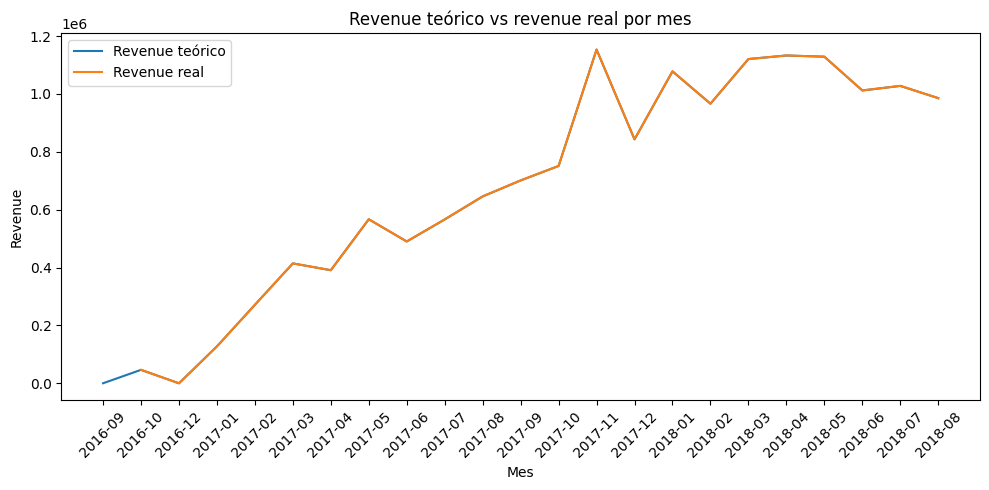

In [11]:
plt.figure(figsize=(10,5))

plt.plot(df_rev["year_month"], df_rev["theoretical_revenue"], label="Revenue teórico")
plt.plot(df_rev["year_month"], df_rev["actual_revenue"], label="Revenue real")

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Revenue")
plt.title("Revenue teórico vs revenue real por mes")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
query = """
SELECT
    strftime('%Y-%m', date) AS year_month,
    SUM(order_revenue) AS theoretical_revenue,
    SUM(total_paid) AS actual_revenue
    FROM fact_orders3
    GROUP BY year_month
    ORDER BY year_month;
"""

df_rev = pd.read_sql(query, conn)

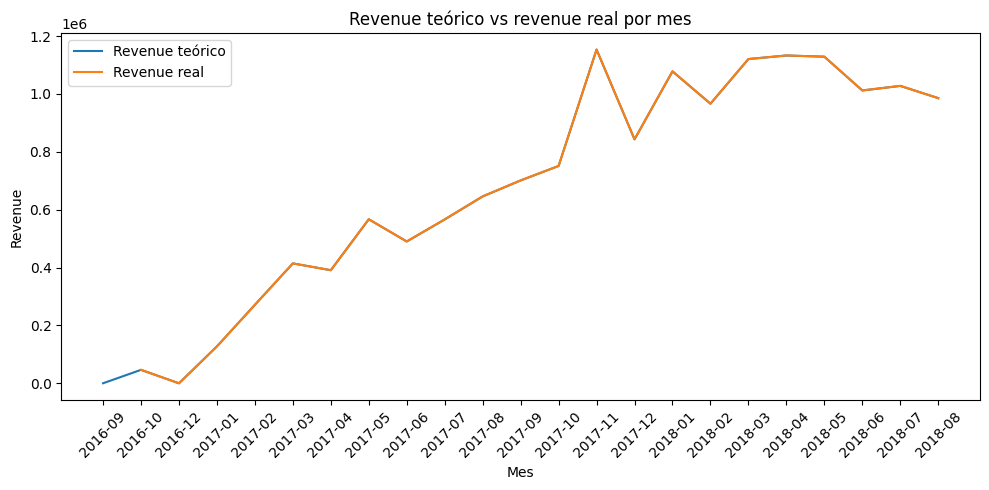

In [13]:
plt.figure(figsize=(10,5))

plt.plot(df_rev["year_month"], df_rev["theoretical_revenue"], label="Revenue teórico")
plt.plot(df_rev["year_month"], df_rev["actual_revenue"], label="Revenue real")

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Revenue")
plt.title("Revenue teórico vs revenue real por mes")
plt.legend()
plt.tight_layout()
plt.show()

## Temporaly evolution of the business.

In [19]:
query = """
SELECT
    strftime('%Y-%m', date) AS year_month,
    COUNT(*) AS orders,
    SUM(total_paid) AS revenue
FROM fact_orders2
WHERE total_paid IS NOT NULL
GROUP BY year_month
ORDER BY year_month;
"""


df_monthly = pd.read_sql(query, conn)


* Monthly revenue:

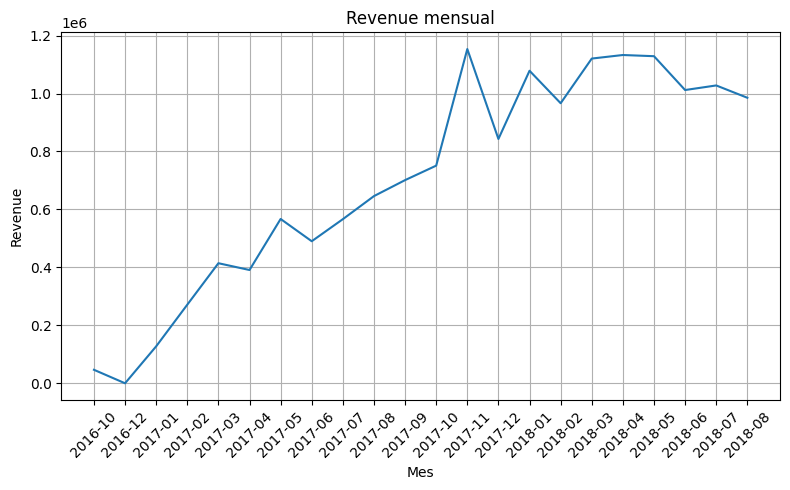

In [20]:
plt.figure(figsize=(8,5))
plt.plot(df_monthly["year_month"], df_monthly["revenue"])
plt.xticks(rotation=45)
plt.title("Revenue mensual")
plt.xlabel("Mes")
plt.ylabel("Revenue")
plt.tight_layout()
plt.grid()
plt.show()

Notamos que la tendencia es que el revenue aumenta de acuerdo al tiempo. No es algo lineal, sino que por momentos puede decrecer pero a la larga "recupera" lo perdido.

* Monthly orders

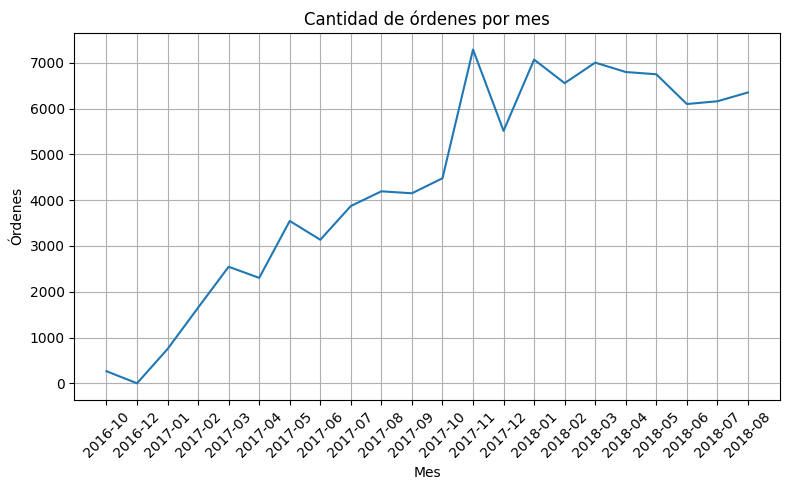

In [21]:
plt.figure(figsize=(8,5))
plt.plot(df_monthly["year_month"], df_monthly["orders"])
plt.xticks(rotation=45)
plt.title("Cantidad de órdenes por mes")
plt.xlabel("Mes")
plt.ylabel("Órdenes")
plt.tight_layout()
plt.grid()
plt.show()

Notamos un comportamiento similar al de revenue.